<h1>Hackathon FCCD: Análise Exploratória de Aluguéis no Brasil</h1>

<p><strong>Autor:</strong> Michael Botelho Santana</p>

<p><strong>Introdução:</strong> O setor imobiliário, no Brasil, tem sido objeto de interesse recorrente, especialmente no que diz respeito aos aluguéis de residências. Este estudo visa realizar uma Análise Exploratória de Dados (EDA) em um conjunto abrangente de dados sobre aluguéis de casas no Brasil. A compreensão das tendências e padrões nesse mercado pode fornecer insights valiosos para inquilinos, proprietários e investidores.</p>

<p><strong>Objetivo do Estudo:</strong> O objetivo principal desta análise é identificar padrões e correlações relevantes que possam impactar o valor dos aluguéis. Ao responder às 18 perguntas fornecidas no contexto do hackathon, buscamos agregar valor ao negócio imobiliário, fornecendo informações que podem orientar decisões estratégicas.</p>

<h2>Principais Características</h2>
<ul>
    <li><strong>city:</strong> Cidade onde o imóvel está localizado.</li>
    <li><strong>area:</strong> Área do imovel.</li>
    <li><strong>rooms:</strong> Número de quartos.</li>
    <li><strong>bathroom:</strong> Número de banheiros.</li>
    <li><strong>parking spaces:</strong> Número de vagas para estacionamento.</li>
    <li><strong>floor:</strong> Andar.</li>
    <li><strong>animal:</strong> Aceita animais?</li>
    <li><strong>furniture:</strong> Imóvel é mobilhado?</li>
    <li><strong>hoa (R$):</strong> Valor do condomínio.</li>
    <li><strong>rent amount (R$):</strong> Valor do Aluguel.</li>
    <li><strong>property tax (R$):</strong> Valor do IPTU.</li>
    <li><strong>fire insurance (R$):</strong> Valor do seguro contra incendio.</li>
    <li><strong>total (R$):</strong> Valor total.</li>
</ul>
<hr>

### Importando bibliotecas

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#### Configs

In [2]:
# configuração das cores
RED_CLEAN = '#d94046'
BLUE_CLEAN = '#3e7fac'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'

### Importando conjunto de dados

In [3]:
# carregando a base de dados
df_house = pd.read_csv('houses_to_rent_v2.csv')

### Pré-processamento dos dados

In [4]:
# visualizando as primeiras instâncias do dataset
df_house.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# verificando presença de valores nulos
df_house.isnull().mean()[df_house.isnull().mean() > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [6]:
# verificando duplicatas
df_house.duplicated().sum()

358

In [7]:
# verificando duplicatas
df_house[df_house.duplicated()]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
244,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
1060,São Paulo,136,3,3,3,13,acept,not furnished,1430,4206,364,54,6054
1064,São Paulo,20,1,1,0,5,acept,furnished,602,1800,130,23,2555
1108,Campinas,184,4,3,4,-,acept,not furnished,0,3240,220,49,3509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,Porto Alegre,40,1,1,1,9,not acept,furnished,1300,1200,68,18,2586
10569,Belo Horizonte,20,1,1,1,-,acept,furnished,0,1100,0,15,1115
10623,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1,45,4951


Numa primeira análise, aparentemente, nosso conjunto de dados não apresenta valores faltantes. Entretanto, observamos que existe uma quantidade significativa de valores duplicados.<br>
<br>
Vamos tratá-los abaixo.

In [8]:
# filtrando o dataset para remover instâncias duplicadas
df_house = df_house[~df_house.duplicated()].reset_index(drop=True).copy()
df_house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10329,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10330,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10331,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10332,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [9]:
# obtendo informações gerais sobre o dataset
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10334 entries, 0 to 10333
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10334 non-null  object
 1   area                 10334 non-null  int64 
 2   rooms                10334 non-null  int64 
 3   bathroom             10334 non-null  int64 
 4   parking spaces       10334 non-null  int64 
 5   floor                10334 non-null  object
 6   animal               10334 non-null  object
 7   furniture            10334 non-null  object
 8   hoa (R$)             10334 non-null  int64 
 9   rent amount (R$)     10334 non-null  int64 
 10  property tax (R$)    10334 non-null  int64 
 11  fire insurance (R$)  10334 non-null  int64 
 12  total (R$)           10334 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.0+ MB


Podemos ver que o nosso conjunto de dados possui 10334 linhas (instâncias) e 13 colunas (features). Observa-se também que não há nenhum campo com valor vazio, além disso, nosso dataset é composto por 10 variáveis do tipo numérica e 3 do tipo categórica.<br>

PS:. A coluna floor, correspondente ao andar do imóvel, está como tipo object (os dados, provavelmente, estão como string). Vamos realizar a conversão dela para o tipo numérica mais a frente.

In [10]:
# obtendo informações estatísticas 
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10334.0,152.439423,545.875595,11.0,59.00,95.0,190.00,46335.0
rooms,10334.0,2.539965,1.168185,1.0,2.00,3.0,3.00,13.0
bathroom,10334.0,2.268725,1.414650,1.0,1.00,2.0,3.00,10.0
parking spaces,10334.0,1.644475,1.598527,0.0,1.00,1.0,2.00,12.0
hoa (R$),10334.0,1091.243952,11446.092263,0.0,180.00,571.0,1286.75,1117000.0
rent amount (R$),10334.0,3966.296013,3436.190007,450.0,1598.25,2750.0,5000.00,45000.0
property tax (R$),10334.0,376.929263,3160.602165,0.0,41.00,130.0,389.75,313700.0
fire insurance (R$),10334.0,54.264273,48.164380,3.0,21.00,37.0,70.00,677.0
total (R$),10334.0,5488.943488,12669.110756,499.0,2116.00,3685.5,6912.00,1120000.0


Com esta breve análise estatística, podemos observar alguns pontos interessantes, como a alta variabilidade da área (area) das casas ou o valor do IPTU (hoa), que atinge um máximo de R$ 1.117.000,00. Fica claro a presença de outliers nos nossos dados, uma vez que a maioria dos valores de IPTU está concentrada em até R$ 1.286,75.
<br>
<br>
Com isso, podemos observar algumas relações entre nossas varíaveis. Agora vamos investigar profundamente e validar essa hipótese buscando obter insights valiosos para o négocio.
<hr>

### Análise Exploratória dos Dados

<p>
<strong>Questões de Negócio Abordadas:</strong>
</p>

<ol>
    <li>Correlação entre área e valor do aluguel</li>
    <li>Impacto da aceitação de animais</li>
    <li>Distribuição de imóveis mobiliados</li>
    <li>Análise de outliers no valor do IPTU (property tax)</li>
    <li>Influência do número de vagas de estacionamento</li>
    <li>Relação entre andar (floor) e valor do aluguel</li>
    <li>Variação das taxas de condomínio (HOA) por cidade</li>
    <li>Correlação entre número de banheiros e valor do alugue</li>
    <li>Variação do valor do aluguel por cidade</li>
    <li>Distribuição do custo total (total)</li>
    <li>Previsão de valor de aluguel baseado em características</li>
    <li>Proporção do seguro incêndio no custo total</li>
    <li>Variação do valor do aluguel com base no número de quartos</li>
    <li>Análise de agrupamento de imóveis</li>
    <li>Influência da localização na taxa de HOA</li>
    <li>Relação entre área e número de quartos/banheiros</li>
    <li>Diferenças no valor do aluguel por tipo de mobília</li>
    <li>Análise de densidade de imóveis por cidade</li>
    <li>Perfil dos imóveis mais caros e mais baratos</li>
    <li>Relação entre quantidade de banheiros e quartos</li>
</ol>

In [11]:
corr_all = df_house.corr().copy()
corr_all['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)       1.000000
fire insurance (R$)    0.987203
bathroom               0.665625
parking spaces         0.573997
rooms                  0.536632
total (R$)             0.349045
area                   0.178228
property tax (R$)      0.106679
hoa (R$)               0.052516
Name: rent amount (R$), dtype: float64

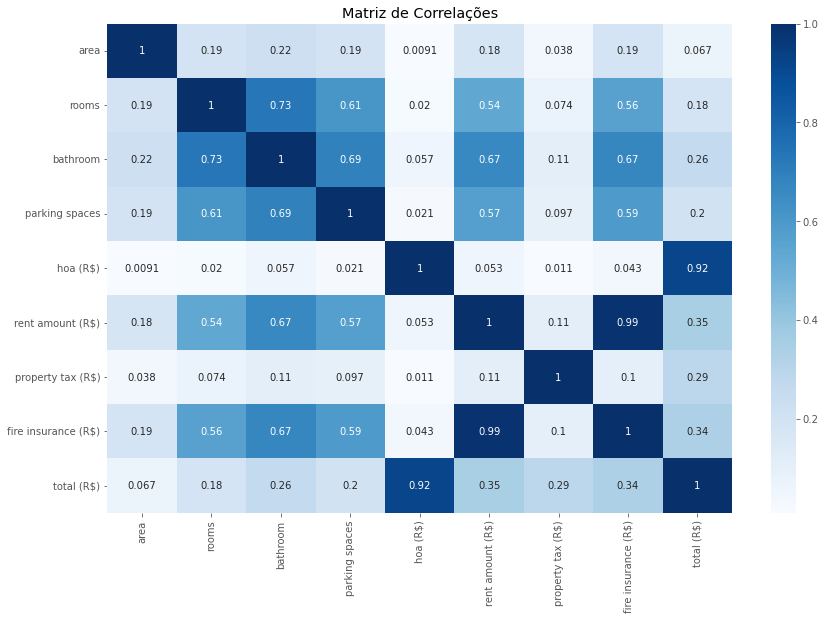

In [12]:
# visualizando correlação entre as variáveis numéricas
plt.figure(figsize=(14, 9))

# gráfico heatmap
sns.heatmap(corr_all, annot=True, cmap='Blues')

plt.title('Matriz de Correlações')
plt.show()

Com essa matriz de correlação, podemos visualizar a relação entre os pares de variáveis.<br>
<br>
Destaque para os pares que apresentaram uma correlação, positiva, **Muito Forte**:<br>
- Valor total (total (R$)) x Valor de IPTU (hoa (R$))
- Valor de aluguel (rent amount (R$)) x Valor do Seguro Contra Incêndio (fire insurance (R$))

#### 1. Existe uma correlação significativa entre a área do imóvel (area) e o valor do aluguel (rent amount)?

In [13]:
# calculando correlação entre area e rent amount
corr_area_rentamount = df_house['area'].corr(df_house['rent amount (R$)'])
print(f'Valor de correlação entre Área do Imóvel e Valor do Aluguel é de {corr_area_rentamount:.2f}')

Valor de correlação entre Área do Imóvel e Valor do Aluguel é de 0.18


O método utilizado para calcular essa correlação foi o de Pearson, que mede a relação linear entre duas variáveis contínuas numa escala de -1 a 1. Sendo 1 para forte correlação positiva, -1 para forte correlação negativa e 0 para sem correlação. <br>

Como nosso valor se aproxima de 0, temos uma correlação fraca entre as duas variáveis.

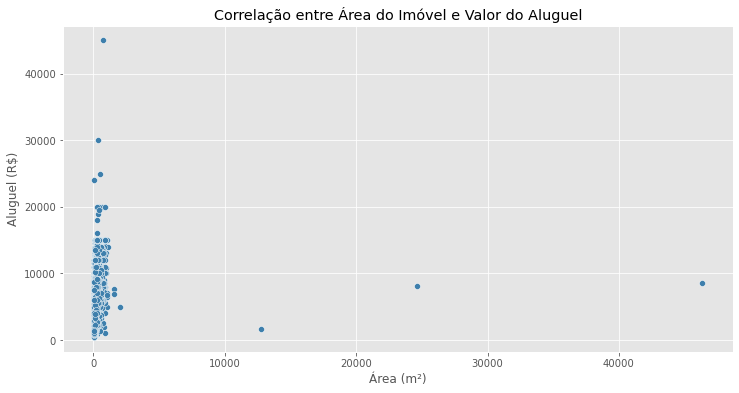

In [14]:
# visualizando dispersão dos dados
plt.figure(figsize=(12,6))

sns.scatterplot(x=df_house['area'], y=df_house['rent amount (R$)'], color=BLUE_CLEAN)

plt.title('Correlação entre Área do Imóvel e Valor do Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')

plt.show()


Como é possível observar, existem alguns outliers tanto para área quanto para o valor do aluguel. Vamos filtrar os dados para observar melhor essa relação entre essas duas variáveis.

In [15]:
# função para filtrar valores de outliers
def no_outlier(df, coluna):

    q1 = np.percentile(df[coluna], 25)
    q3 = np.percentile(df[coluna], 75)

    iqr = q3 - q1

    bigode_inferior = q1 - 1.5*iqr
    bigode_superior = q3 + 1.5*iqr

    return df[(df[coluna] >= bigode_inferior) & (df[coluna] <= bigode_superior)]

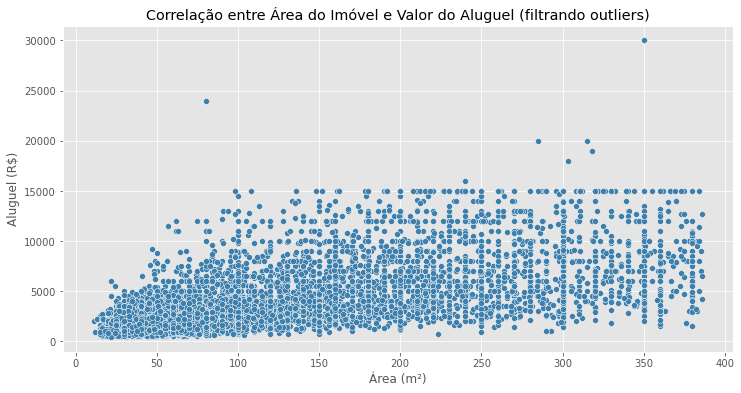

In [16]:
plt.figure(figsize=(12,6))

df_filtred = no_outlier(df_house, 'area')
sns.scatterplot(x=df_filtred['area'], y=df_filtred['rent amount (R$)'], color=BLUE_CLEAN)

plt.title('Correlação entre Área do Imóvel e Valor do Aluguel (filtrando outliers)')
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')

plt.show()

Observando agora a faixa com maior concentração dos dados, podemos notar que existe uma leve tendência no aumento do valor do aluguel à medida que a área aumenta. Contudo, como já calculado, essa é uma correlação fraca, pois, existe uma dispersão considerável indicando uma variabilidade significativa nos tamanhos dos imóveis e nos valores de aluguel, isso se agrava ainda mais com a presença dos outliers observados.<br><br>
Por fim, a correlação positiva fraca sugere que, em geral, imóveis maiores têm tendência a ter valores de aluguel mais altos. No entanto, a variabilidade nos dados e a presença de outliers indicam que outros fatores também podem influenciar os valores de aluguel.

#### 2. Como a aceitação de animais (animal) afeta o valor do aluguel (rent amount)?

In [17]:
# calculando mediana do valor de aluguel para casas que aceitam e casas que não aceitam animais
animal_acept, animal_notacept = df_house.groupby(by=['animal'])['rent amount (R$)'].median()
print(f'Valor mediano do aluguel para casas que:\n -Aceitam Animais: R${animal_acept}\n -Não Aceitam Animais: R${animal_notacept}')

Valor mediano do aluguel para casas que:
 -Aceitam Animais: R$2800.0
 -Não Aceitam Animais: R$2500.0


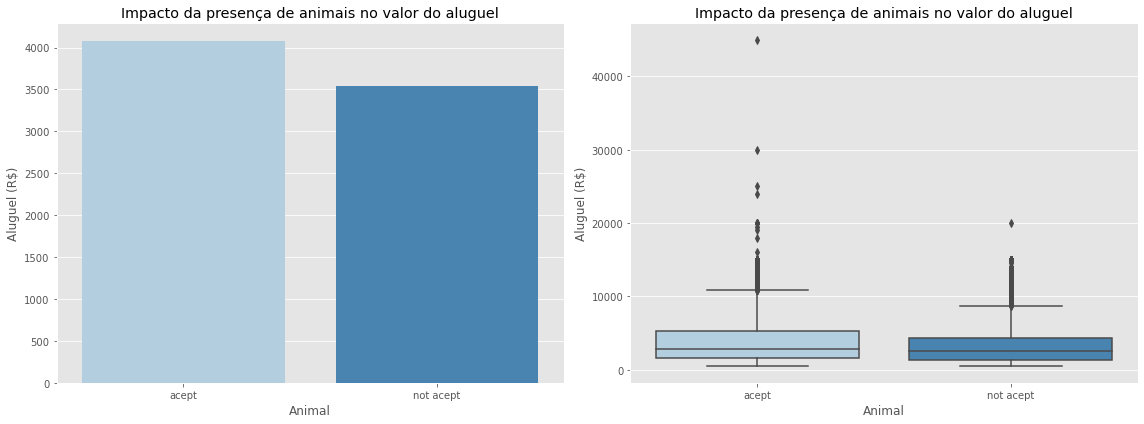

In [18]:
# visualizando dispersão dos dados, usando valores de área concentrados até o terceiro quartil (182m²)
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)

# gráfico de barras da mediana dos valores de aluguel para casas que aceitam e não aceitam animais
ax = sns.barplot(x=df_house['animal'], y=df_house['rent amount (R$)'], data=df_house, ci=None, palette='Blues')

plt.title('Impacto da presença de animais no valor do aluguel')
plt.xlabel('Animal')
plt.ylabel('Aluguel (R$)')


plt.subplot(1, 2, 2)

# gráfico de caixa para os valores de aluguel em casas que aceitam e não aceitam animais
sns.boxplot(x=df_house['animal'], y=df_house['rent amount (R$)'], palette='Blues')

plt.title('Impacto da presença de animais no valor do aluguel')
plt.xlabel('Animal')
plt.ylabel('Aluguel (R$)')

plt.tight_layout()

plt.show()

Casas que aceitam animais alcançam valores de aluguéis mais altos em comparação as que não aceitam animais.

#### 3. Qual é a proporção de imóveis mobiliados (furniture) e não mobiliados? Existe diferença no valor do aluguel entre eles?

In [19]:
# calculando média e mediana, respectivamente, do valor de aluguel para imóveis com e sem mobília
display(df_house.groupby('furniture')['rent amount (R$)'].mean())
display(df_house.groupby('furniture')['rent amount (R$)'].median())

furniture
furnished        4977.907753
not furnished    3640.908684
Name: rent amount (R$), dtype: float64

furniture
furnished        3600.0
not furnished    2465.0
Name: rent amount (R$), dtype: float64

In [20]:
# calculando a proporção da diferença entre o valor de aluguel para imóveis com e sem mobília
valor_furn, valor_notfurn = df_house.groupby('furniture')['rent amount (R$)'].median()
porc_valor = ((valor_furn - valor_notfurn)/valor_notfurn)*100

print(f'O Valor mediano do aluguel para casas mobiliadas é {porc_valor:.2f}% maior que o valor para casas não mobiliadas')

O Valor mediano do aluguel para casas mobiliadas é 46.04% maior que o valor para casas não mobiliadas


In [21]:
# calculando proporção de imóveis com e sem mobília no cenário geral
com_mob, sem_mob = df_house.groupby('furniture')['rent amount (R$)'].count()

print(f'O número de casas mobiliadas representa {(com_mob/(com_mob+sem_mob))*100:.2f}%\
 de todas as casas. Já os imóveis não mobiliados representam {(1-(com_mob/(com_mob+sem_mob)))*100:.2f}%\
 desse total.')

O número de casas mobiliadas representa 24.34% de todas as casas. Já os imóveis não mobiliados representam 75.66% desse total.


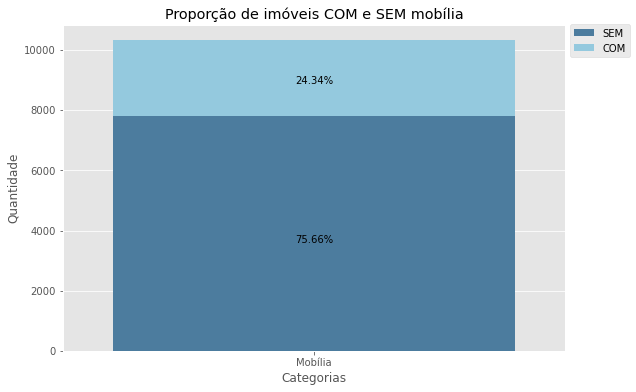

In [22]:
# visualizando proporção de imóveis com e sem mobília
data = {'Categorias': ['Mobília'],
        'valueA': int(sem_mob),
        'valueB': int(com_mob)}

df = pd.DataFrame(data)

# criando um gráfico de barras empilhadas
plt.figure(figsize=(9, 6))
sns_plotA = sns.barplot(x='Categorias', y='valueA', data=df, color=BLUE_CLEAN, label='SEM')
sns_plotB = sns.barplot(x='Categorias', y='valueB', data=df, bottom=df['valueA'], color='skyblue', label='COM')

# indexando porcentagem nos subconjuntos
for bar, porcentagem in zip(sns_plotB.patches + sns_plotA.patches, [(com_mob/(com_mob+sem_mob))*100, (1-(com_mob/(com_mob+sem_mob)))*100]):
    height = bar.get_height()
    width = bar.get_width()
    plt.text(bar.get_x() + width / 2, height + 1000, f'{porcentagem:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Proporção de imóveis COM e SEM mobília')
plt.ylabel('Quantidade')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.95))

plt.show()


Nesse conjunto de dados, podemos visualizar que mais de 75% dos imóveis não possuem mobília previamente disponível para os inquilinos enquanto que menos de 1/4 dos 10334 imóveis são mobíliados. Como já era presumível o valor do aluguel dessas residências com mobília é maior que o valor para residências não mobiliadas, em mediana 46.04%.

#### 4. Existem outliers significativos no valor do IPTU? Como eles impactam o valor total (total)?

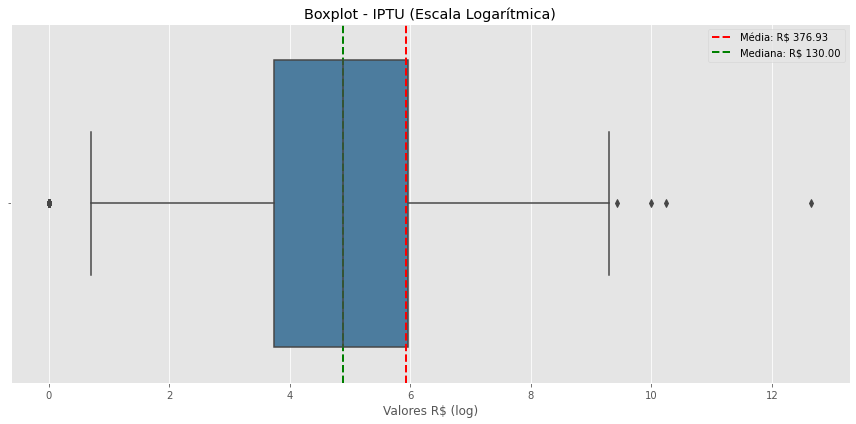

In [23]:
# visualizando distribuição do valor de IPTU
mean = df_house['property tax (R$)'].mean()
median = df_house['property tax (R$)'].median()

plt.figure(figsize=(12, 6))

sns.boxplot(x=np.log1p(df_house['property tax (R$)']), color=BLUE_CLEAN)
plt.axvline(np.log1p(mean), color='red', linestyle='dashed', linewidth=2, label=f'Média: R$ {mean:.2f}')
plt.axvline(np.log1p(median), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: R$ {median:.2f}')
plt.legend()
plt.title('Boxplot - IPTU (Escala Logarítmica)')
plt.xlabel('Valores R$ (log)')

plt.tight_layout()
plt.show()

Vemos aqui que o Imposto Predial e Territorial Urbano (IPTU) possui valores de outliers expressivos. Podemos evidenciar isso pelo impacto que os outliers superiores geram na média dessa variável, causando um aumento significativo nela.<br>

Outro ponto é a necessecidade de usar a escala logarítmica para poder visualizar os dados, pelo fato dos valores referentes aos outliers terem uma amplitude muito grande (o valor máximo de IPTU encontrado foi de R$ 313.700,00, enquanto a maior parte dos dados (75%) está concentrada até R$ 389,75).

In [24]:
# analisando a correlação entre IPTU e o Valor Total do Imóvel
correlation = df_house['property tax (R$)'].corr(df_house['total (R$)'])
print(f'Correlação entre IPTU e Valor Total: {correlation:.2f}')

Correlação entre IPTU e Valor Total: 0.29


Num primeiro momento obtemos um valor de correlção baixo entre IPTU e Valor Total do Imóvel, porém já vimos que a feature IPTU apresenta outliers significativos o que pode gerar uma falsa relação entre as variáveis. Vamos visualizar melhor como esses dados estão distribuídos.

In [25]:
# filtrando dataframe para remover valores de outliers nas variáveis 'hoa (R$)' e 'total (R$)'
q1A = np.percentile(df_house['property tax (R$)'], q = 25)
q3A = np.percentile(df_house['property tax (R$)'], q = 75)

q1B = np.percentile(df_house['total (R$)'], q = 25)
q3B = np.percentile(df_house['total (R$)'], q = 75)

IQRA = q3A - q1A
IQRB = q3B - q1B

df_sem_outlier = df_house[((df_house['property tax (R$)'] <= q3A + IQRA*1.5) & (df_house['property tax (R$)'] >= q1A - IQRA*1.5)\
                            & (df_house['total (R$)'] <= q3B + IQRB*1.5) & (df_house['total (R$)'] >= q1B - IQRB*1.5)\
                                  & (df_house['property tax (R$)'] != 0))]

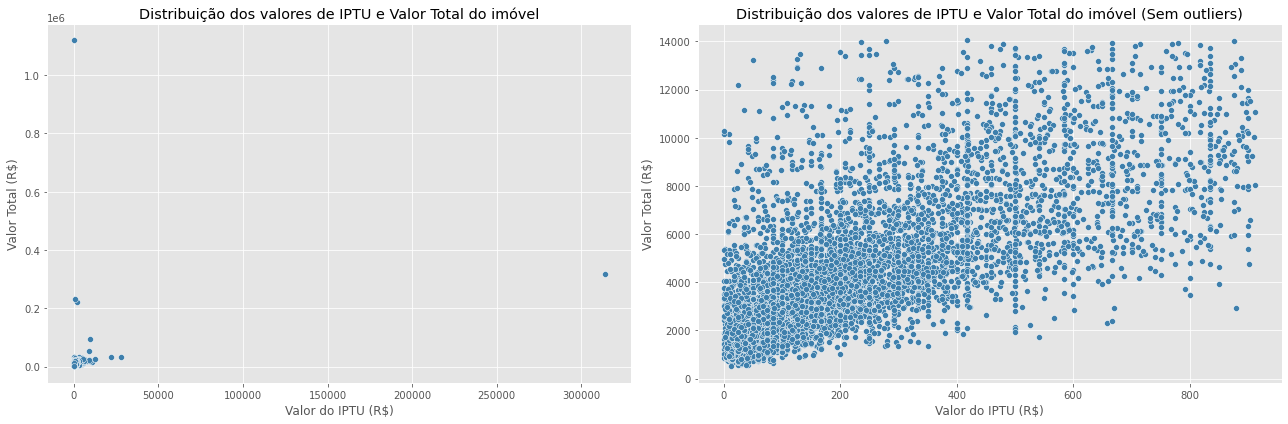

In [26]:
# visualizando se existe tendência aparente entre as variáveis
plt.figure(figsize=(18, 6))

# gráfico de dispersão usando escala logarítmica
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_house['property tax (R$)'], y=df_house['total (R$)'], color=BLUE_CLEAN)

plt.title('Distribuição dos valores de IPTU e Valor Total do imóvel')
plt.xlabel('Valor do IPTU (R$)')
plt.ylabel('Valor Total (R$)')

# gráfico de dispersão filtrando os outliers das variáveis estudadas
plt.subplot(1, 2, 2)

df_filter = df_sem_outlier
sns.scatterplot(x=df_filter['property tax (R$)'], y=df_filter['total (R$)'], color=BLUE_CLEAN)

plt.title('Distribuição dos valores de IPTU e Valor Total do imóvel (Sem outliers)')
plt.xlabel('Valor do IPTU (R$)')
plt.ylabel('Valor Total (R$)')

plt.tight_layout()
plt.show()

In [27]:
# analisando a correlação entre IPTU e o Valor Total do Imóvel
correlation = df_sem_outlier['property tax (R$)'].corr(df_sem_outlier['total (R$)'])
print(f'Correlação entre IPTU e Valor Total: {correlation:.2f}')

Correlação entre IPTU e Valor Total: 0.73


Depois de filtrarmos nossos dados retirando os outliers, vemos que a correlação entre as features aumentou bastante. Como vemos nos dois gráficos acima, a presença dos ouliers pode gerar uma correlação enganosa (distorcendo a tendência dos dados).<br>

No geral, sem os outliers, existe uma tendência positiva significativa o que mostra um aumento no Valor Total do Imóvel a medida que o valor do IPTU aumenta, apesar da alta dispersão dos dados também observada.

#### 5. Como o número de vagas de estacionamento (parking spaces) influencia o valor do aluguel (rent amount)?

In [28]:
# analisado a correlação entre essas duas variáveis
corr_parking_rent = df_house['parking spaces'].corr(df_house['rent amount (R$)'])
print(f'Valor de correlação entre vagas de estacionamento e valor do aluguel: {corr_parking_rent:.2f}')

Valor de correlação entre vagas de estacionamento e valor do aluguel: 0.57


Inicialmente, nota-se uma correlação moderada entre o número de vagas de estacionamento e o valor do aluguel. Vamos investigar mais afundo essa relação.

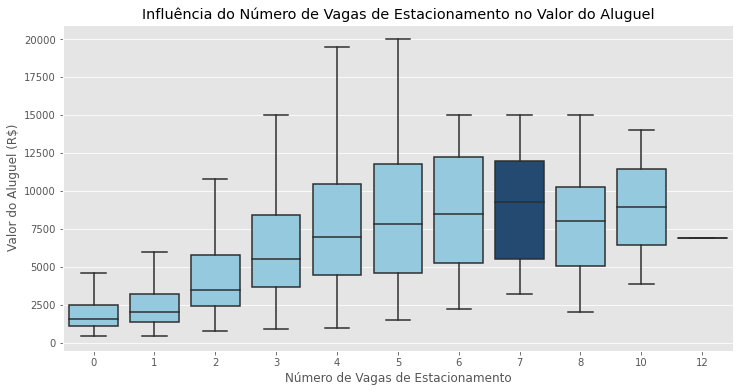

In [29]:
# paleta de cores customizada para destaque
median_values = df_house.groupby('parking spaces')['rent amount (R$)'].median()
custom_palette = [AZUL1 if median == median_values.max() else 'skyblue' for median in median_values]

# visualizando a distribuição dos dados
plt.figure(figsize=(12, 6))

sns.boxplot(x='parking spaces', y='rent amount (R$)', data=df_house, showfliers=False, palette=custom_palette)

plt.title('Influência do Número de Vagas de Estacionamento no Valor do Aluguel')
plt.xlabel('Número de Vagas de Estacionamento')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()


Podemos visualizar um crescimento no valor médio do aluguel a medida que o número de vagas aumenta. Entretanto, depois de 6 vagas o valor mediano do aluguel permanece com pouca variabilidade.<br>

Olhando de uma perspectiva econômica é viável, para um négocio imobiliário, adicionar mais vagas de estacionamento em um imóvel visando elevar o ticket médio do aluguel. Outro ponto que pode ser considerado é uma avaliação da viabilidade de investir em melhorias de estacionamento para propriedades que atualmente têm menos vagas. Isso pode aumentar o valor do aluguel e atrair um grupo maior de locatários. Vale ressaltar que essa relação foi observada viável até 7 vagas, após esse número não existe aumento do ticket médio do aluguel.

#### 6. Existe alguma tendência no valor do aluguel com base no andar do imóvel?

In [30]:
# convertendo valores das colunas de andar e valor de aluguel em dados numéricos
df_house['floor'] = pd.to_numeric(df_house['floor'], errors='coerce')
df_house['rent amount (R$)'] = pd.to_numeric(df_house['rent amount (R$)'], errors='coerce')

# verificando
print(f"Tipo de dados para 'andar': {df_house['floor'].dtype}")
print(f"Tipo de dados para 'valor de aluguel': {df_house['rent amount (R$)'].dtype}")


Tipo de dados para 'andar': float64
Tipo de dados para 'valor de aluguel': int64


In [31]:
df_house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7.0,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20.0,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6.0,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2.0,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10329,Porto Alegre,63,2,1,1,5.0,not acept,furnished,402,1478,24,22,1926
10330,São Paulo,285,4,4,4,17.0,acept,not furnished,3100,15000,973,191,19260
10331,Rio de Janeiro,70,3,3,0,8.0,not acept,furnished,980,6000,332,78,7390
10332,Rio de Janeiro,120,2,2,2,8.0,acept,furnished,1585,12000,279,155,14020


Observa-se que existem valores na coluna 'floor' que não possuem o número do andar. Precisamos tratar esses casos antes de prosseguir com nossa análise.

In [32]:
# filtrando dados para remover instâncias sem número do andar
df_parcial_floor = df_house[df_house['floor'].isnull() == False].copy()

In [33]:
# calculando correlação entre as colunas
correlation = df_parcial_floor['floor'].corr(df_parcial_floor['rent amount (R$)'])

print(f"A correlação entre 'floor' e 'rent amount (R$)' é: {correlation:.2f}")

A correlação entre 'floor' e 'rent amount (R$)' é: 0.21


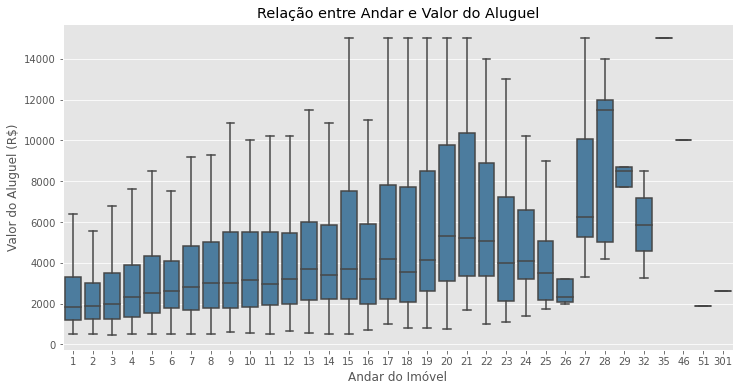

In [34]:
# visualizando a dispersão dos dados
plt.figure(figsize=(12,6))

# ordenando pelo andar
df_parcial_floor['floor'] = df_parcial_floor['floor'].astype('Int64') # convertendo valor dos andares para inteiro
sorted_floors = sorted(df_parcial_floor['floor'].unique())

# gráfico de caixa
sns.boxplot(x='floor', y='rent amount (R$)', data=df_parcial_floor, order=sorted_floors, showfliers=False, color=BLUE_CLEAN)

plt.title('Relação entre Andar e Valor do Aluguel')
plt.xlabel('Andar do Imóvel')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()

Como já era esperado, o valor médio do aluguel aumenta a medida que subimos os andares (andares mais altos, geralmente, possuem mais luz natural e melhores vistas o que valorizam eles). Entretanto é uma ascendência tímida e nos andares mais altos vemos uma grande variação nos valores (vamos investigar isso mais afundo).<br>

Para isso, vamos selecionar o andar 26 (tem valores atípicos para andares superiores) e o andar 21 que é um andar superior com valores seguindo a tendência.

In [35]:
# visualizando andar com valor de aluguel abaixo da média e acima da média, respectivamente
dfA_stats = df_parcial_floor[df_parcial_floor['floor'] == 26].describe().T
dfB_stats = df_parcial_floor[df_parcial_floor['floor'] == 21].describe().T

display(dfA_stats)
display(dfB_stats)

,count,mean,std,min,25%,50%,75%,max
area,13.0,95.461538,106.148964,22.0,23.0,23.0,211.0,305.0
rooms,13.0,1.846154,1.281025,1.0,1.0,1.0,2.0,4.0
bathroom,13.0,2.153846,1.573010,1.0,1.0,1.0,4.0,5.0
parking spaces,13.0,1.692308,1.750458,0.0,0.0,1.0,3.0,5.0
floor,13.0,26.000000,0.000000,26.0,26.0,26.0,26.0,26.0
hoa (R$),13.0,1279.230769,1441.112773,295.0,399.0,487.0,1500.0,5071.0
rent amount (R$),13.0,4864.615385,4838.756065,2000.0,2100.0,2300.0,3200.0,14000.0
property tax (R$),13.0,427.000000,658.277930,40.0,44.0,59.0,717.0,2241.0
fire insurance (R$),13.0,62.923077,62.742146,26.0,27.0,30.0,41.0,187.0
total (R$),13.0,6634.230769,6811.389691,2365.0,2619.0,2909.0,5134.0,21500.0


,count,mean,std,min,25%,50%,75%,max
area,42.0,193.833333,158.585195,28.0,69.75,138.5,291.25,690.0
rooms,42.0,2.666667,1.140532,1.0,2.00,2.5,4.00,5.0
bathroom,42.0,2.952381,1.637255,1.0,2.00,2.0,4.00,7.0
parking spaces,42.0,2.333333,1.748402,0.0,1.00,2.0,4.00,6.0
floor,42.0,21.000000,0.000000,21.0,21.00,21.0,21.00,21.0
hoa (R$),42.0,2143.619048,1713.258099,400.0,936.50,1576.0,2960.00,7100.0
rent amount (R$),42.0,6967.761905,4428.568517,1701.0,3350.00,5220.0,10375.00,15000.0
property tax (R$),42.0,792.500000,985.026092,0.0,137.25,234.0,1216.50,3942.0
fire insurance (R$),42.0,87.500000,54.049774,22.0,42.75,66.5,126.00,191.0
total (R$),42.0,9991.547619,6543.152154,2397.0,4573.75,7636.0,15597.50,23870.0


Essa breve análise estatística nos revela alguns pontos importantes. Entre eles a área média dos apartamentos, no andar mais alto esse valor é correspondente a menos da metate da média do andar inferior analisado e isso impacta diretamente no valor do aluguel. Outros fatores como número de quartos, banheiros e vagas de estacionamento, que agregam valor ao aluguel, seguem padrão similar (em média possuem valores menores para o andar alto analisado).

#### 7. Como as taxas de condomínio variam entre diferentes cidades?


In [36]:
# agrupando valor das taxas de condomínio por cidade
df_house['hoa (R$)'].groupby(df_house['city']).median().sort_values(ascending=False)

city
Rio de Janeiro    810.0
São Paulo         690.0
Campinas          490.0
Porto Alegre      350.0
Belo Horizonte    300.0
Name: hoa (R$), dtype: float64

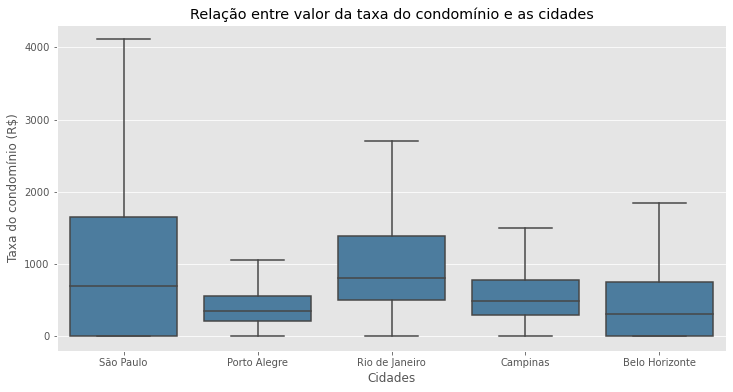

In [37]:
# visualizando essa relação
plt.figure(figsize=(12, 6))

# representação do valor mediano das taxas por cidade
sns.boxplot(x='city', y='hoa (R$)', data=df_house, showfliers = False, color=BLUE_CLEAN)

plt.title('Relação entre valor da taxa do condomínio e as cidades')
plt.xlabel('Cidades')
plt.ylabel('Taxa do condomínio (R$)')

plt.show()

Em resumo, a análise indica que há diferenças significativas nas taxas de condomínio entre as cidades, com destaque para a grande variação em São Paulo.<br>

Rio de Janeiro possui (em termos de mediana) os maiores valores para taxa de condomínio, seguida de São Paulo (como esperado, as grandes capitais tendem a ter valores mais elevados).<br>

Vale destacar a cidade de São Paulo, que possui a maior variação de taxa entre todas as cidades. Podendo encontrar residências com valor de taxa próximo a zero e residências com taxas acima de R$ 4.000,00.

#### 8. Qual é a relação entre o número de banheiros (bathroom) e o valor do aluguel (rent amount)?

In [38]:
# calculando correlação entre número de banheiros e valor do aluguel
corr_banheiro_aluguel = df_house['bathroom'].corr(df_house['rent amount (R$)'])

print(f'Valor de correlação entre nº de banheiros e o valor do aluguel é {corr_banheiro_aluguel:.2f}')

Valor de correlação entre nº de banheiros e o valor do aluguel é 0.67


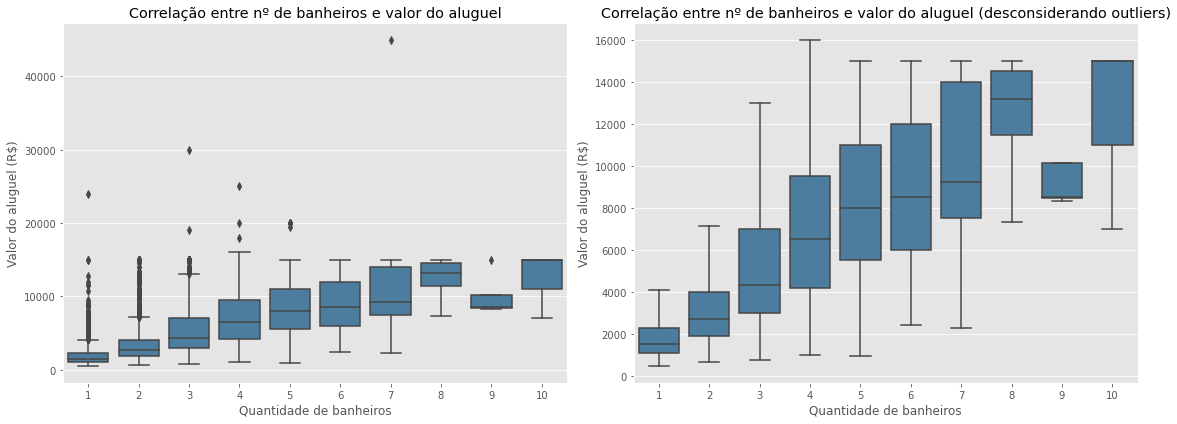

In [39]:
# visualizando a tendência entre número de banheiros e valor do aluguel
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
# gráfico da relação entre bathroom e rent amount
sns.boxplot(x='bathroom', y='rent amount (R$)', data=df_house, showfliers=True, color=BLUE_CLEAN)

plt.title('Correlação entre nº de banheiros e valor do aluguel')
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Valor do aluguel (R$)')

plt.subplot(1, 2, 2)
# gráfico da relação entre bathroom e rent amount
sns.boxplot(x='bathroom', y='rent amount (R$)', data=df_house, showfliers=False, color=BLUE_CLEAN)

plt.title('Correlação entre nº de banheiros e valor do aluguel (desconsiderando outliers)')
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Valor do aluguel (R$)')

plt.tight_layout()
plt.show()

No geral, a observamos uma forte correlação positiva entre o número de banheiros e o valor do aluguel (ou seja, em mediana, quanto mais banheiros um imóvel tiver a tendência é que isso agregue valor ao aluguel desse imóvel).<br>

Outro aspecto a se observar é na grande variação de outliers, como visto no gráfico da esquerda, que pode indicar o impacto de outras características no valor do aluguel (como já analisado, o valor do aluguel é uma feature que sofre impacto de outras features <área do imóvel, andar, vagas de estacionamento, ...>)

#### 9. Como o valor do aluguel (rent amount) varia entre diferentes cidades?

In [40]:
# agrupando valor das taxas de condomínio por cidade
df_house['rent amount (R$)'].groupby(df_house['city']).median().sort_values(ascending=False)

city
São Paulo         3500.0
Belo Horizonte    2400.0
Rio de Janeiro    2400.0
Porto Alegre      1620.0
Campinas          1500.0
Name: rent amount (R$), dtype: float64

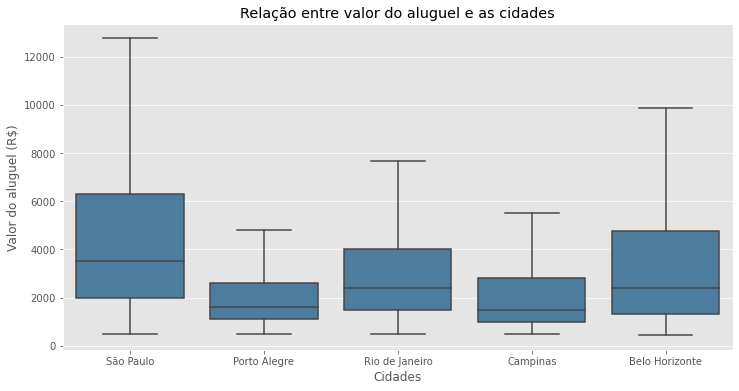

In [41]:
# visualizando essa relação
plt.figure(figsize=(12, 6))

# representação do valor mediano das taxas por cidade
sns.boxplot(x='city', y='rent amount (R$)', data=df_house, showfliers = False, color=BLUE_CLEAN)

plt.title('Relação entre valor do aluguel e as cidades')
plt.xlabel('Cidades')
plt.ylabel('Valor do aluguel (R$)')

plt.show()

Novamente, São Paulo se destaca como a capital que possui maior variação. Nesse caso, é a capital onde os valores de alguel dos imóveis mais varia e também a cidade a atingir os aluguéis mais altos.<br>

A surpresa fica por conta de Belo Horizonte, sendo a segunda cidade a atingir os aluguéis mais elevados. Mesmo tendo uma valor de aluguel, em mediana, igual ao do Rio de Janeiro superou o mesmo em alcançar os maiores valores.

#### 10. Como é a distribuição do custo total dos aluguéis?

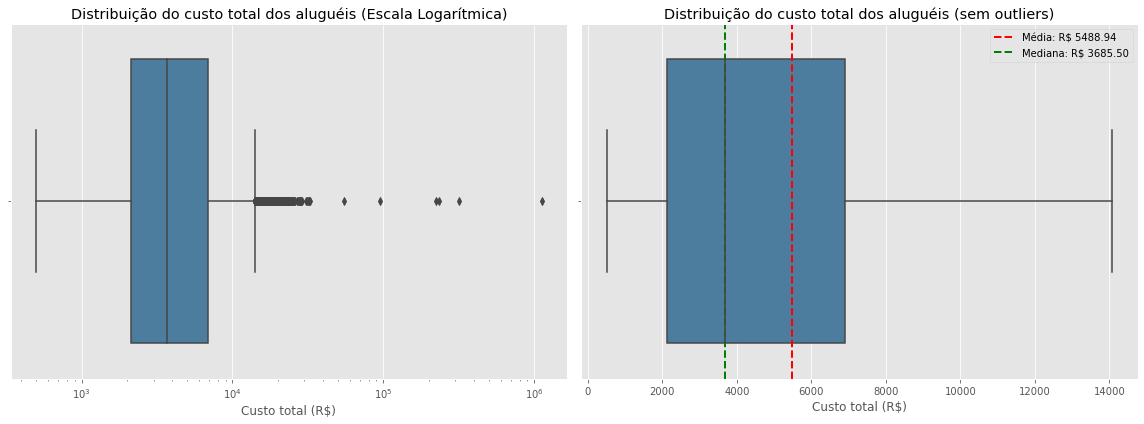

In [42]:
# visualizando a distribuição do custo total dos aluguéis
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

sns.boxplot(x=df_house['total (R$)'], color=BLUE_CLEAN, showfliers=True)

plt.title('Distribuição do custo total dos aluguéis (Escala Logarítmica)')
plt.xscale('log')
plt.xlabel('Custo total (R$)')

plt.subplot(1, 2, 2)

mean_total = df_house['total (R$)'].mean()
median_total = df_house['total (R$)'].median()

sns.boxplot(x=df_house['total (R$)'], color=BLUE_CLEAN, showfliers=False)

plt.axvline(mean_total, color='red', linestyle='dashed', linewidth=2, label=f'Média: R$ {mean_total:.2f}')
plt.axvline(median_total, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: R$ {median_total:.2f}')
plt.legend()
plt.title('Distribuição do custo total dos aluguéis (sem outliers)')
plt.xlabel('Custo total (R$)')

plt.tight_layout()
plt.show()

De início é possível observar que o custo total dos aluguéis podem atingir valores exorbitantes (na casa dos milhões), como evidenciado no gráfico da esquerda pelos outliers.<br>

No geral, a maior parte dos valores estão concentrados até cerca de R$ 7.000,00. Sendo o valor mediano do custo total dos aluguéis de R$ 3.581,50. Alguns fatores podem ser elencados aqui para justificar essa alta variação no custo total do aluguel, como a região onde o imóvel se localiza e a área dele.

#### 11. Qual é a proporção do seguro incêndio (fire insurance) no custo total (total)?

In [43]:
# calculando proporção do seguro incêndio sobre o custo total
s_proporcao = (df_house['fire insurance (R$)']/df_house['total (R$)'])*100

print(f'Proporção do seguro incêndio no valor total do aluguel: {np.median(s_proporcao):.4}%')

Proporção do seguro incêndio no valor total do aluguel: 1.007%


Em uma análise geral, a proporção que o valor do seguro incêndio representa no custo total é de pouco mais que 1%.<br>
<br>
Vamos analisar de forma mais aprofundada, investigando essa proporção segmentada por features como:<br>
- Proporção por cidade (city)
- Aceitação de animais (animal)
- Imóvel mobiliado ou não (furniture)

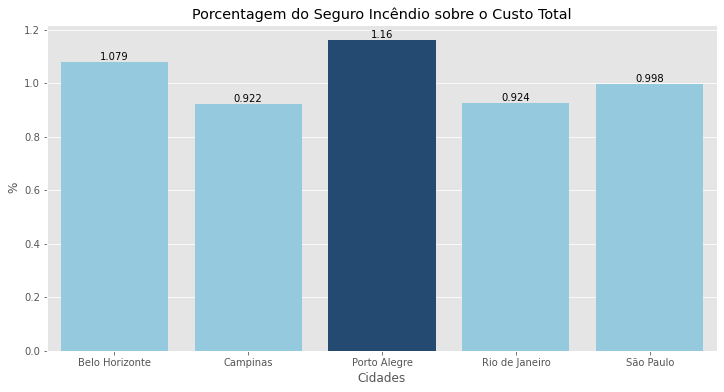

In [44]:
# segmentando proporções
df_house['fire_porc'] = (df_house['fire insurance (R$)']/df_house['total (R$)'])*100
agg_city = pd.DataFrame(df_house['fire_porc'].groupby(df_house['city']).median()).reset_index() # cidades
agg_animal = pd.DataFrame(df_house['fire_porc'].groupby(df_house['animal']).median()).reset_index() # animais
agg_furniture = pd.DataFrame(df_house['fire_porc'].groupby(df_house['furniture']).median()).reset_index() # mobília

# visualizando proporção por cidade
plt.figure(figsize=(12, 6))

def insertTxt(data):

    for idx, value in enumerate(data.round(3)):
        plt.text(idx, value, str(value), ha='center', va='bottom')

custom_palette_city = [AZUL1 if valor == agg_city['fire_porc'].max() else 'skyblue' for valor in agg_city['fire_porc']]

# gráfico de barras
sns.barplot(x='city', y='fire_porc', data=agg_city, palette=custom_palette_city)

insertTxt(agg_city['fire_porc'])

plt.title('Porcentagem do Seguro Incêndio sobre o Custo Total')
plt.xlabel('Cidades')
plt.ylabel('%')

plt.show()

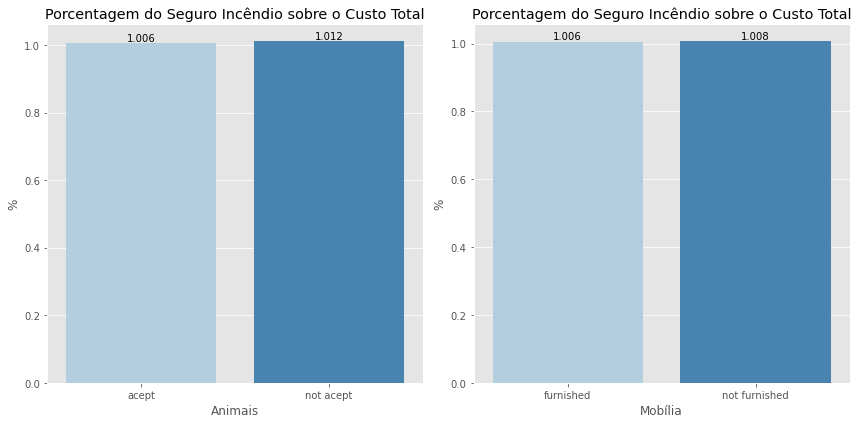

In [45]:
# visualizando proporção por aceitação de animais e mobília
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# gráfico de barras
sns.barplot(x='animal', y='fire_porc', data=agg_animal, palette='Blues')

insertTxt(agg_animal['fire_porc'])

plt.title('Porcentagem do Seguro Incêndio sobre o Custo Total')
plt.xlabel('Animais')
plt.ylabel('%')

plt.subplot(1, 2, 2)

# gráfico de barras
sns.barplot(x='furniture', y='fire_porc', data=agg_furniture, palette='Blues')

insertTxt(agg_furniture['fire_porc'])

plt.title('Porcentagem do Seguro Incêndio sobre o Custo Total')
plt.xlabel('Mobília')
plt.ylabel('%')

plt.tight_layout()
plt.show()

Podemos concluir então:

- A proporção do seguro incêndio sobre o custo total, no cenário geral, é de ~1%.
- Porto Alegre é a cidade onde essa proporção se mostrou maior, porém com uma diferença muito baixa do valor geral.
- O imóvel ser ou não mobiliado, assim como aceitar ou não animais não afeta significativamente o valor do seguro incêndio.

#### 12. Como o número de quartos (rooms) afeta o valor do aluguel (rent amount)?

In [46]:
# calculando correlação entre número de banheiros e valor do aluguel
df_house['rooms'].corr(df_house['rent amount (R$)'])

0.5366321917303011

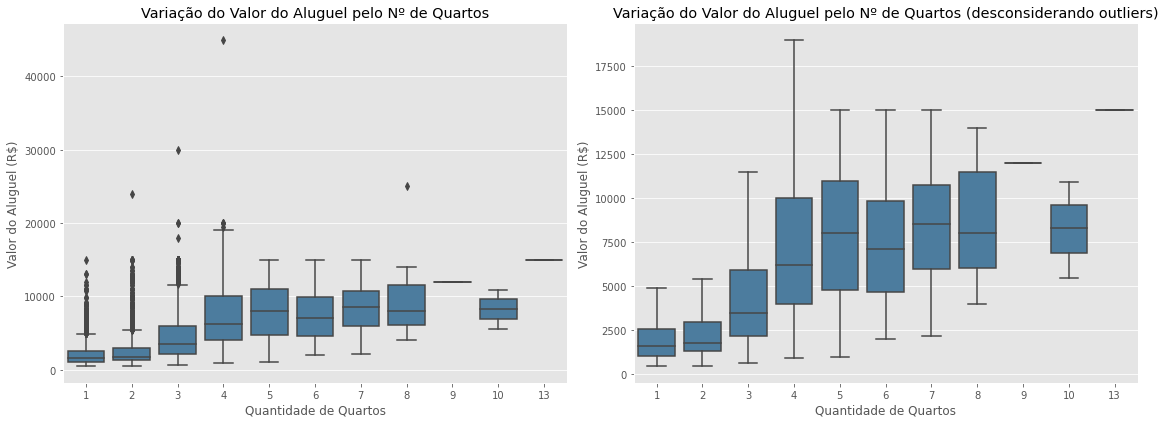

In [47]:
# visualizando a tendência entre número de banheiros e valor do aluguel
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
# gráfico da relação entre bathroom e rent amount
sns.boxplot(x='rooms', y='rent amount (R$)', data=df_house, showfliers=True, color=BLUE_CLEAN)

plt.title('Variação do Valor do Aluguel pelo Nº de Quartos')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Valor do Aluguel (R$)')

plt.subplot(1, 2, 2)
# gráfico da relação entre bathroom e rent amount
sns.boxplot(x='rooms', y='rent amount (R$)', data=df_house, showfliers=False, color=BLUE_CLEAN)

plt.title('Variação do Valor do Aluguel pelo Nº de Quartos (desconsiderando outliers)')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout()
plt.show()

Como já era esperado, ter mais quartos em um imóvel tende a aumentar o valor do seu aluguel.<br>
<br>
Lembrando que o valor do aluguel é afetado por mais de uma variável. Podemos observar isso pela grande variação dos valores vistos acima.

#### 13. A localização (cidade) tem impacto significativo na taxa de HOA?

Para responder essa questão, vamos agrupar os valores da taxa HOA por cidade.

In [48]:
# identificando o valor mediano da taxa do condomínio (HOA), por cidade
s_hoa_city = df_house.groupby('city')['hoa (R$)'].median()
s_hoa_city

city
Belo Horizonte    300.0
Campinas          490.0
Porto Alegre      350.0
Rio de Janeiro    810.0
São Paulo         690.0
Name: hoa (R$), dtype: float64

In [49]:
# média da taxa
mean_city = s_hoa_city[s_hoa_city != s_hoa_city['Rio de Janeiro']].mean()

print(f'Média da Taxa HOA entre as cidades (excluindo Rio de Janeiro): R$ {mean_city} \
\nProporção do maior valor de taxa sobre a média: \
{((max(s_hoa_city) - mean_city)/mean_city)*100:.2f}%')

Média da Taxa HOA entre as cidades (excluindo Rio de Janeiro): R$ 457.5 
Proporção do maior valor de taxa sobre a média: 77.05%


Podemos ver que existe grande variação dos valores da taxa por cidade, com destaque para Rio de Janeiro que tem a taxa HOA 77.05% maior que a mediana das cidades.<br>
<br>
Agora vamos visualizar a variação desses valores e ver se existem outliers que podem estar impactando o valor médio da taxa.

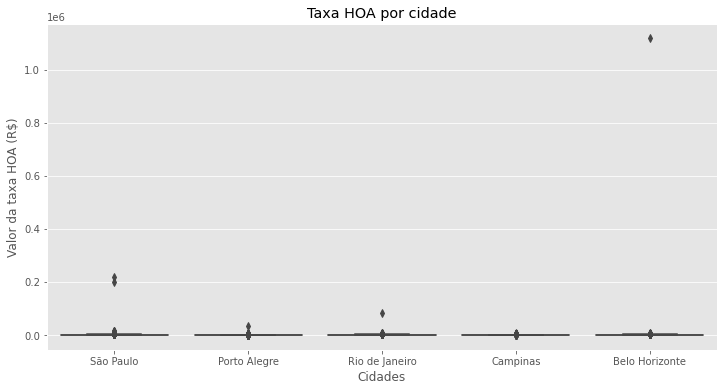

In [50]:
# visualização da taxa HOA por cidade
plt.figure(figsize=(12, 6))

sns.boxplot(x='city', y='hoa (R$)', data=df_house, color=BLUE_CLEAN)

plt.title('Taxa HOA por cidade')
plt.xlabel('Cidades')
plt.ylabel('Valor da taxa HOA (R$)')

plt.show()

De cara já podemos ver que existem outliers com valores expressivos, o que dificulta até a visualização geral das tendências. Vamos remover os outliers para uma melhor visualização.

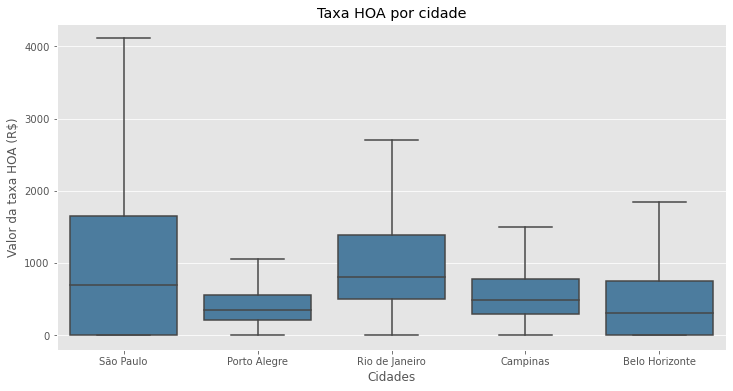

In [51]:
# visualização da taxa HOA por cidade
plt.figure(figsize=(12, 6))

sns.boxplot(x='city', y='hoa (R$)', data=df_house, showfliers=False, color=BLUE_CLEAN)

plt.title('Taxa HOA por cidade')
plt.xlabel('Cidades')
plt.ylabel('Valor da taxa HOA (R$)')

plt.show()

Pronto! Agora temos uma visão mais clara da variação das taxas entre as cidades.<br>

- Podemos observar que São Paulo é a cidade onde a taxa mais varia, 
- Porto Alegre é a cidade com menor variação

Vamos visualizar a distribuição da frequência desses valores em cada cidade.

In [52]:
# obtendo valor máximo do HOA de São Paulo, para facilitar a visualização dos gráficos
q3_sp = np.percentile(df_house['hoa (R$)'][df_house.city == 'São Paulo'], q=75)
q1_sp = np.percentile(df_house['hoa (R$)'][df_house.city == 'São Paulo'], q=25)

iqr = q3_sp - q1_sp

extremo_superior = q3_sp + (1.5 * iqr)
print(f'Valor máximo da taxa HOA em São Paulo, desconsiderando outliers, é de R$ {extremo_superior}')

Valor máximo da taxa HOA em São Paulo, desconsiderando outliers, é de R$ 4125.0


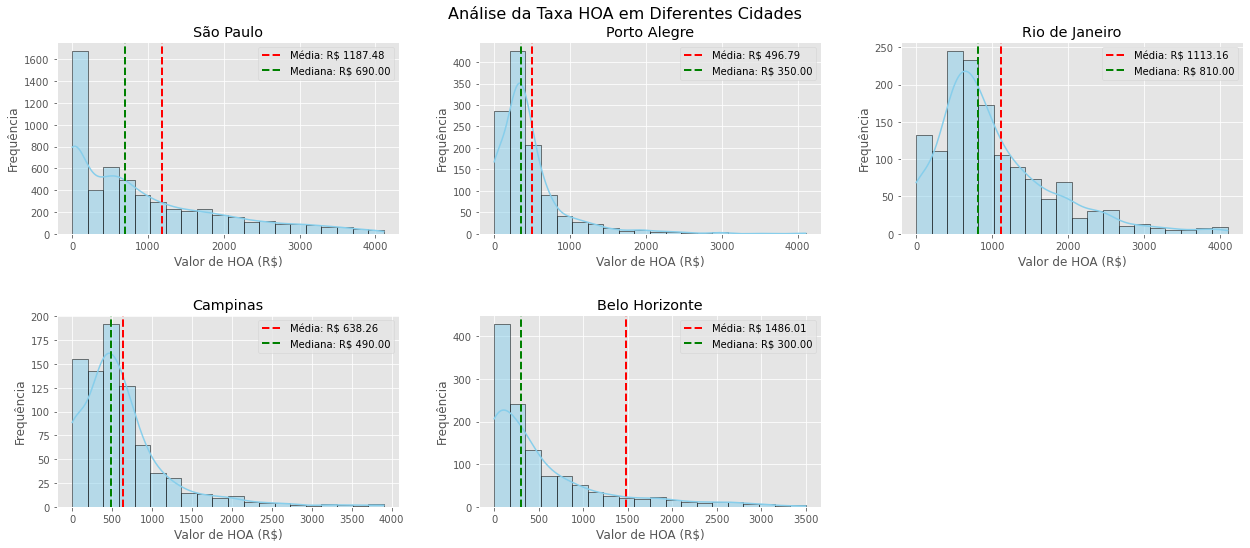

In [53]:
# função para plotagem dos histogramas
def plot_histogram(ax, data, title):

    # define taxa
    taxa = 4125
    sns.histplot(x=data[data < taxa], kde=True, color='skyblue', bins=20, edgecolor='black', ax=ax)
    
    # adicionando legendas
    mean_val = data.mean()
    median_val = data.median()

    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Média: R$ {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: R$ {median_val:.2f}')

    ax.set_title(title)
    ax.set_xlabel('Valor de HOA (R$)')
    ax.set_ylabel('Frequência')
    ax.legend()

# plotagem
plt.figure(figsize=(18, 8))

for idx, value in enumerate(list(df_house['city'].unique())):

    ax = plt.subplot(2, 3, idx + 1)
    plot_histogram(ax, df_house['hoa (R$)'][df_house['city'] == value], value)

# ajuste de espaçamento entre os gráficos
plt.tight_layout(pad=3.0)
plt.suptitle('Análise da Taxa HOA em Diferentes Cidades', fontsize=16)

plt.show()

Agora podemos entender melhor como o valor da taxa HOA se comporta em cada cidade. Podemos destacar:

- Belo Horizonte é a cidade mais impactada por outliers (observa-se pela média, uma medida de tendência central sensível a valores atípicos, que se desprende da região da mediana). Entretanto é, em valor mediano, a cidade com menor taxa HOA;
- Campinas e Porto Alegre possuem uma variação menor no valor da taxa HOA;
- São Paulo e Rio de Janeiro são as cidades com maior taxa HOA (desconsiderando os outliers).

Como esperado, podemos concluir que as grandes capitais são as cidades mais caras em relação a taxa HOA. Isso provavelmente é um reflexo da própria economia da região, que possui um custo de vida elevado.<br>

#### 14. Existe uma relação entre a área do imóvel (area) e o número de quartos (rooms) e banheiros (bathroom)?

Primeiro, vamos analisar se existe correlação entre os pares de variáveis:

- Área do Imóvel (area) x Nº de Quartos (rooms)
- Área do Imóvel (area) x Nº de Banheiros (bathroom)


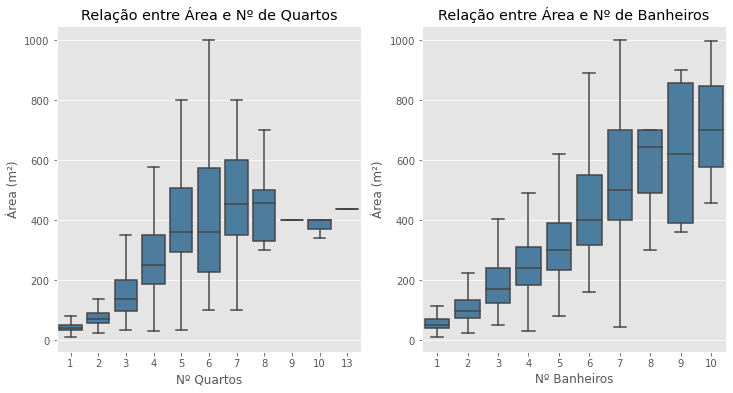

In [54]:
# visualizando correlações
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.boxplot(x='rooms', y='area', data=df_house, showfliers=False, color=BLUE_CLEAN)

plt.title('Relação entre Área e Nº de Quartos')
plt.xlabel('Nº Quartos')
plt.ylabel('Área (m²)')

plt.subplot(1, 2, 2)

sns.boxplot(x='bathroom', y='area', data=df_house, showfliers=False, color=BLUE_CLEAN)

plt.title('Relação entre Área e Nº de Banheiros')
plt.xlabel('Nº Banheiros')
plt.ylabel('Área (m²)')

plt.show()

Podemos observar uma clara ascendência na relação entre as variáveis, indicando que existe um correlação positiva entre elas. Agora vamos obter esse coeficiente de correlação.<br>

(Como vimos, a presença de outliers impacta de forma expressiva a visualização dos nossos dados, logo será utilizada a correlação de Spearman para essa tarefa, pois ela é menos sensível aos outliers).

In [55]:
# obtendo valor de correlação
area_room_corr = df_house['area'].corr(df_house['rooms'], method='spearman')
area_bathroom_corr = df_house['area'].corr(df_house['bathroom'], method='spearman')

print(f'Valor de correlação entre:\n \
    Área x Nº Quartos = {area_room_corr:.2f}\n \
    Área x Nº Banheiros = {area_bathroom_corr:.2f}')

Valor de correlação entre:
     Área x Nº Quartos = 0.84
     Área x Nº Banheiros = 0.83


Dado os valores de correlação, podemos concluir que a área do imóvel tem forte correlação positiva tanto com o número de quartos quanto o número de banheiros presente no imóvel. Isso nos indica que os imóveis com mais cômodos tendem a ter uma área maior em relação aos com menos cômodos.

#### 15. Como a presença ou ausência de mobília (furniture) afeta o valor do aluguel (rent amount)?

Para isso, vamos comparar o valor médio do aluguel para cada classe.

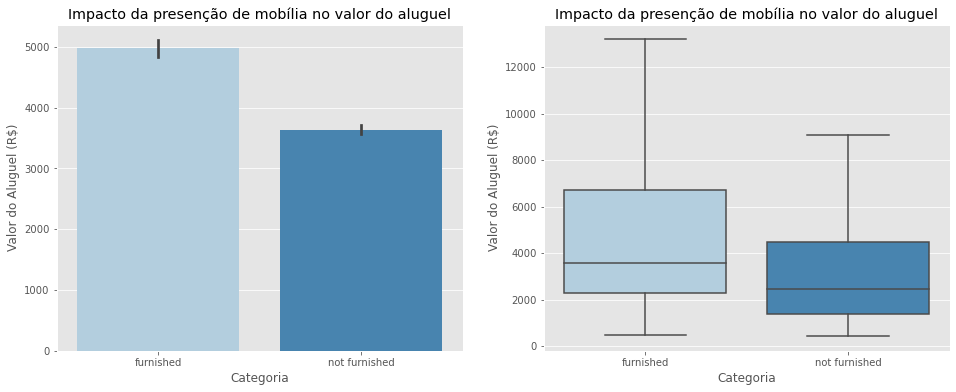

In [56]:
# visualizando valor médio por categoria
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

sns.barplot(x='furniture', y='rent amount (R$)', data=df_house, palette='Blues')

plt.title('Impacto da presenção de mobília no valor do aluguel')
plt.xlabel('Categoria')
plt.ylabel('Valor do Aluguel (R$)')

plt.subplot(1, 2, 2)

sns.boxplot(x='furniture', y='rent amount (R$)', data=df_house, showfliers=False, palette='Blues')

plt.title('Impacto da presenção de mobília no valor do aluguel')
plt.xlabel('Categoria')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()

Ao compararmos os valores de aluguel para as duas categorias, Mobiliado e Não Mobiliado, podemos ver que a presença de mobília em um imóvel impacta positivamente no valor do aluguel desse imóvel. Ou seja, imóveis mobiliados tendem a ter seus alugueis mais valorizados (valor de aluguel mais alto) em comparação aos que não possuem mobília.

#### 16. Qual cidade possui mais imóveis listados para aluguel?

Para responder essa pergunta precisamos agrupar as instâncias por cidade.

In [57]:
# realizando contagem de alugueis por cidade
city_counts = df_house['city'].value_counts().reset_index() \
                              .rename(columns={'index': 'city', 'city': 'quantity'})
city_counts

,city,quantity
0,São Paulo,5717
1,Rio de Janeiro,1431
2,Belo Horizonte,1209
3,Porto Alegre,1154
4,Campinas,823


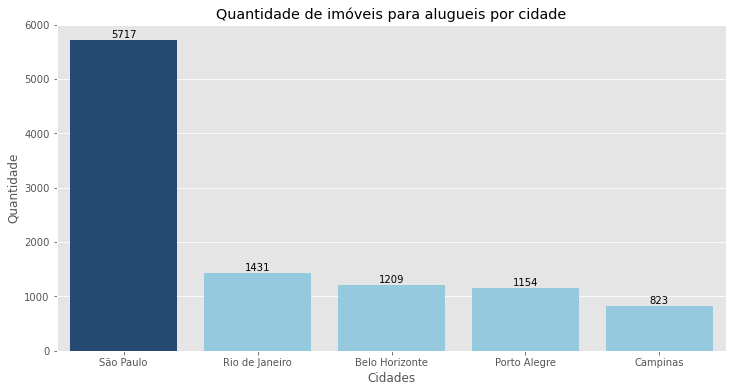

In [58]:
# visualizando graficamente
plt.figure(figsize=(12, 6))

custom_palette_alug = [AZUL1 if valor == city_counts['quantity'].max() else 'skyblue' for valor in city_counts['quantity']]

sns.barplot(x='city', y='quantity', data=city_counts, palette=custom_palette_alug)

plt.title('Quantidade de imóveis para alugueis por cidade')
plt.xlabel('Cidades')
plt.ylabel('Quantidade')

insertTxt(city_counts['quantity'])

plt.show()

In [59]:
# calculando a proporção da cidade com maior número de aluguéis em relação a média das outras cidades
mean_city = city_counts[city_counts['city'] != 'São Paulo'].mean()
value_sp = city_counts.loc[0, 'quantity']
porc_sp = ((value_sp - mean_city)/mean_city)
porc_sp

quantity    3.953
dtype: float64

Podemos ver que São Paulo é, disparadamente, a cidade com maior número de imóveis para aluguel alcançando um total de 5717. Esse valor representa, aproximadamente, 3.95 vezes a média das outras cidades.

#### 17. Quais características são comuns nos imóveis com os valores de aluguel mais altos e mais baixos?

Para responder essa pergunta precisamos ter uma visão ampla de quais outros fatores afetam essa feature

In [60]:
# análise estatística
df_ordered = df_house.sort_values(by=['rent amount (R$)']).copy()
df_top_alugueis_altos = df_ordered.tail(100).copy()
df_top_alugueis_baixos = df_ordered.head(100).copy()

In [61]:
# obtendo inferências estatísticas
display(df_top_alugueis_altos.describe().T)
display(df_top_alugueis_baixos.describe().T)

,count,mean,std,min,25%,50%,75%,max
area,100.0,417.700000,197.103444,80.000000,286.500000,374.50000,500.000000,999.000000
rooms,100.0,4.060000,1.434214,1.000000,3.000000,4.00000,4.000000,13.000000
bathroom,100.0,4.790000,1.519536,1.000000,4.000000,5.00000,5.250000,10.000000
parking spaces,100.0,3.910000,1.995424,0.000000,3.000000,4.00000,5.000000,8.000000
floor,60.0,8.333333,5.967899,1.000000,3.000000,7.50000,12.000000,27.000000
hoa (R$),100.0,4378.740000,19902.404532,0.000000,0.000000,2424.00000,4153.500000,200000.000000
rent amount (R$),100.0,16015.000000,3725.732929,15000.000000,15000.000000,15000.00000,15000.000000,45000.000000
property tax (R$),100.0,1624.450000,1610.894954,0.000000,489.750000,1167.00000,2185.000000,8750.000000
fire insurance (R$),100.0,222.390000,61.142803,191.000000,191.000000,200.00000,226.000000,677.000000
total (R$),100.0,22241.300000,20774.994860,15190.000000,17067.500000,19560.00000,21480.000000,222100.000000


,count,mean,std,min,25%,50%,75%,max
area,100.0,40.120000,13.841294,16.000000,30.000000,39.500000,48.250000,82.000000
rooms,100.0,1.140000,0.348735,1.000000,1.000000,1.000000,1.000000,2.000000
bathroom,100.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
parking spaces,100.0,0.300000,0.460566,0.000000,0.000000,0.000000,1.000000,1.000000
floor,86.0,4.453488,3.306525,1.000000,2.000000,4.000000,5.750000,15.000000
hoa (R$),100.0,318.980000,233.807742,0.000000,199.750000,327.500000,420.750000,1500.000000
rent amount (R$),100.0,546.840000,43.360765,450.000000,500.000000,550.000000,595.000000,628.000000
property tax (R$),100.0,28.940000,35.758963,0.000000,10.000000,17.000000,37.250000,244.000000
fire insurance (R$),100.0,7.880000,1.085069,3.000000,7.000000,8.000000,8.250000,11.000000
total (R$),100.0,902.640000,250.447580,499.000000,797.750000,915.500000,1004.000000,2112.000000


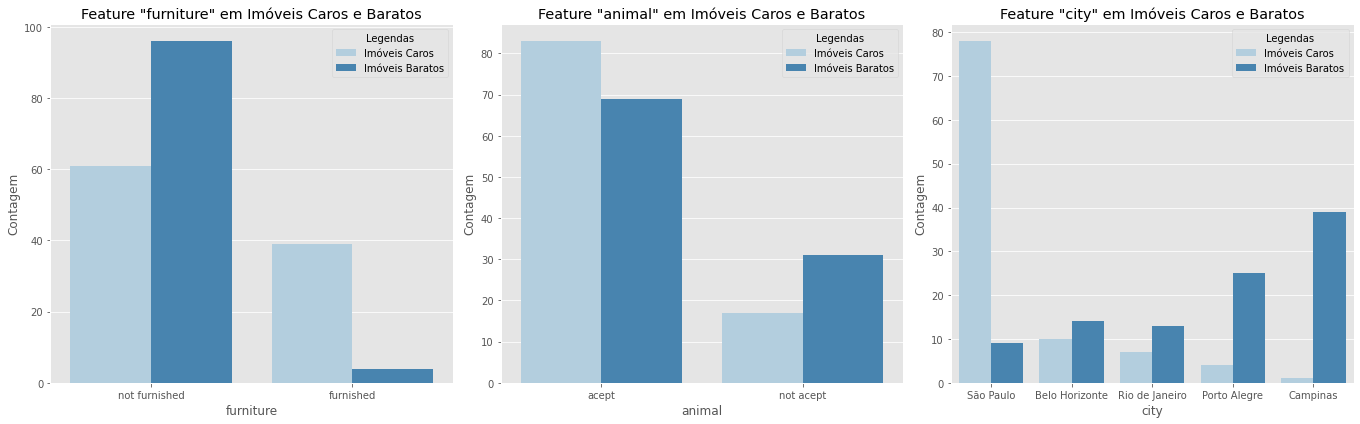

In [62]:
# colunas para análise
features = ['furniture', 'animal', 'city']

# criando visualização
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(19, 6))

# gerando os gráficos
for i, feature in enumerate(features):

    # agrupando dados para visualização
    top = dict(df_top_alugueis_altos[feature].value_counts())
    bottom = dict(df_top_alugueis_baixos[feature].value_counts())

    caros_df = pd.DataFrame(list(top.items()), columns=[feature, 'Count'])
    baratos_df = pd.DataFrame(list(bottom.items()), columns=[feature, 'Count'])

    # montando df
    merged_df = pd.concat([caros_df.assign(Legendas='Imóveis Caros'), baratos_df.assign(Legendas='Imóveis Baratos')])

    sns.barplot(x=feature, y='Count', hue='Legendas', data=merged_df, palette='Blues', ax=axes[i])
    axes[i].set_title(f'Feature "{feature}" em Imóveis Caros e Baratos')
    axes[i].set_ylabel('Contagem')


plt.tight_layout()
plt.show()

In [63]:
# proporção da aceitação de animais em aluguéis caros e baratos
animal_yes_top, animal_no_top = df_top_alugueis_altos['animal'].value_counts()
animal_yes_bottom, animal_no_bottom = df_top_alugueis_baixos['animal'].value_counts()

animal_prop_top = (animal_yes_top - animal_no_top)/animal_no_top
animal_prop_bottom = (animal_yes_bottom - animal_no_bottom)/animal_no_bottom

print(f'Aceitação de animais em aluguéis caros é {animal_prop_top:.2f} vezes maior que a não aceitação')
print(f'Aceitação de animais em aluguéis baratos é {animal_prop_bottom:.2f} vezes maior que a não aceitação')

Aceitação de animais em aluguéis caros é 3.88 vezes maior que a não aceitação
Aceitação de animais em aluguéis baratos é 1.23 vezes maior que a não aceitação


Principais características dos aluguéis altos e baixos:

- Concentração dos aluguéis mais altos na cidade de São Paulo.
- Valor das variáveis (area, rooms, bathroom, parking spaces) mais alto para os aluguéis elevados.
- Em aluguéis mais altos é mais comum imóveis com mobília.
- Aceitação de animais é cerca de 3.88 vezes maior em aluguéis com valor elevado e apenas 1.23 vezes em aluguéis com os valores mais baixos, mostrando assim uma maior aceitação de animais em imóveis de "luxo".

Obs: Caro e barato foram estabelecidos com referência aos dados trabalhados nesse dataset.

#### 18. Existe uma correlação entre o número de quartos (rooms) e o número de banheiros (bathroom)?

In [64]:
# definindo correlação entre nº de quartos e nº de banheiros
print(f"Valor de correlação entre Nº de quartos e Nº de banheiros é: {df_house['rooms'].corr(df_house['bathroom']):.2f}")

Valor de correlação entre Nº de quartos e Nº de banheiros é: 0.73


Inicialmente, podemos notar uma correlação positiva e significativa. Vamos visualizar com está essa distribuição dos dados para garantirmos que esse valor não seja enganoso (devido a presença de outliers).

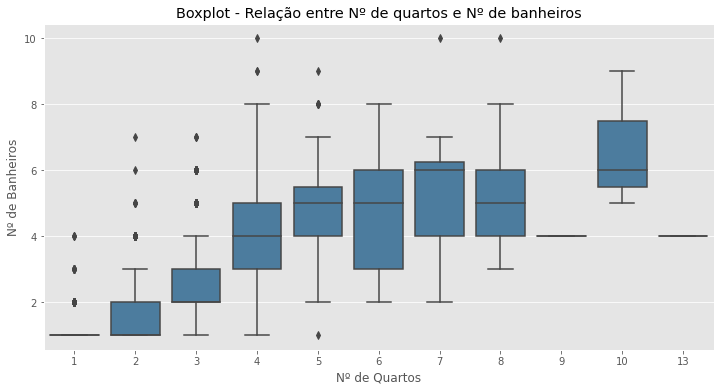

In [65]:
# visualizando distribuição
plt.figure(figsize=(12, 6))

sns.boxplot(x='rooms', y='bathroom', data=df_house, showfliers=True, color=BLUE_CLEAN)

plt.title('Boxplot - Relação entre Nº de quartos e Nº de banheiros')
plt.xlabel('Nº de Quartos')
plt.ylabel('Nº de Banheiros')

plt.show()

A tendência apresentada pelo nosso gráfico é de que quanto mais quartos um imóvel tiver, mais banheiros ele tende a ter também.

### Conclusões

• Considerar investimentos em vagas de estacionamento:
Avaliar a viabilidade de investir em mais vagas de estacionamento até 7 vagas, pois isso pode aumentar o valor médio do aluguel.

• Destaque para imóveis mobiliados:
Investir em imóveis mobiliados pode ser uma estratégia para elevar os valores de aluguel, considerando a tendência positiva identificada.

• Segmentação de mercado por número de quartos e banheiros:
Segmentar o mercado com base no número de quartos e banheiros pode ser uma estratégia eficaz para atender a diferentes demandas de locatários.

• Revisão da política de aceitação de animais:
Considerar a revisão da política de aceitação de animais, pois há uma correlação leve, mas positiva, com o valor do aluguel.

• Ficar atento as grandes capitais:
As grandes capitais analisadas, em especial São Paulo, se destacam em relação as demais cidades no quesito valor do aluguel.